In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

import os 
os.getcwd()

'/home/aniederberger/switch/Master_AI/Unterlagen_Moodle/M05_Open_science_ethics/M05_ProjectReproducibility/notebooks'

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
data_margin = pd.read_csv("../data/data_Mar_64.txt", header=None)
data_margin.columns = ["Species"]+["margin"+str(i) for i in range(data_margin.shape[1]-1)]
data_margin

,Species,margin0,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63
0,Acer Campestre,0.003906,0.003906,0.027344,0.033203,0.007812,0.017578,0.023438,0.005859,0.000000,...,0.011719,0.000000,0.005859,0.035156,0.027344,0.033203,0.001953,0.000000,0.017578,0.000000
1,Acer Campestre,0.005859,0.013672,0.027344,0.025391,0.013672,0.029297,0.019531,0.000000,0.001953,...,0.017578,0.000000,0.021484,0.017578,0.046875,0.005859,0.003906,0.003906,0.046875,0.000000
2,Acer Campestre,0.011719,0.001953,0.027344,0.044922,0.017578,0.042969,0.023438,0.000000,0.003906,...,0.035156,0.000000,0.015625,0.021484,0.056641,0.009766,0.003906,0.000000,0.015625,0.000000
3,Acer Campestre,0.013672,0.011719,0.037109,0.017578,0.011719,0.087891,0.023438,0.000000,0.000000,...,0.015625,0.001953,0.021484,0.029297,0.033203,0.003906,0.000000,0.001953,0.027344,0.000000
4,Acer Campestre,0.007812,0.009766,0.027344,0.025391,0.001953,0.005859,0.015625,0.000000,0.005859,...,0.023438,0.001953,0.021484,0.048828,0.056641,0.019531,0.000000,0.000000,0.013672,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zelkova Serrata,0.035156,0.027344,0.005859,0.005859,0.007812,0.027344,0.035156,0.000000,0.011719,...,0.023438,0.011719,0.013672,0.015625,0.003906,0.011719,0.000000,0.015625,0.003906,0.000000
1596,Zelkova Serrata,0.015625,0.009766,0.000000,0.001953,0.015625,0.033203,0.080078,0.000000,0.005859,...,0.056641,0.007812,0.001953,0.005859,0.007812,0.009766,0.000000,0.035156,0.003906,0.015625
1597,Zelkova Serrata,0.013672,0.005859,0.007812,0.003906,0.015625,0.013672,0.078125,0.000000,0.007812,...,0.039062,0.003906,0.013672,0.003906,0.003906,0.013672,0.000000,0.037109,0.009766,0.009766
1598,Zelkova Serrata,0.015625,0.015625,0.011719,0.000000,0.007812,0.015625,0.060547,0.000000,0.003906,...,0.050781,0.015625,0.001953,0.005859,0.000000,0.017578,0.000000,0.011719,0.003906,0.009766


In [6]:
data_margin = pd.read_csv("../data/data_Mar_64.txt", header=None)
data_margin.columns = ["Species"]+["margin"+str(i) for i in range(data_margin.shape[1]-1)]
data_shape = pd.read_csv("../data/data_Sha_64.txt", header=None)
data_shape.columns = ["Species"]+["shape"+str(i) for i in range(data_margin.shape[1]-1)]
data_texture = pd.read_csv("../data/data_Tex_64.txt", header=None)
data_texture.columns = ["Species"]+["texture"+str(i) for i in range(data_margin.shape[1]-1)]

In [7]:
set(list(data_shape.Species))

{'Acer Campestre',
 'Acer Capillipes',
 'Acer Circinatum',
 'Acer Mono',
 'Acer Opalus',
 'Acer Palmatum',
 'Acer Pictum',
 'Acer Platanoids',
 'Acer Rubrum',
 'Acer Rufinerve',
 'Acer Saccharinum',
 'Alnus Cordata',
 'Alnus Maximowiczii',
 'Alnus Rubra',
 'Alnus Sieboldiana',
 'Alnus Viridis',
 'Arundinaria Simonii',
 'Betula Austrosinensis',
 'Betula Pendula',
 'Callicarpa Bodinieri',
 'Castanea Sativa',
 'Celtis Koraiensis',
 'Cercis Siliquastrum',
 'Cornus Chinensis',
 'Cornus Controversa',
 'Cornus Macrophylla',
 'Cotinus Coggygria',
 'Crataegus Monogyna',
 'Cytisus Battandieri',
 'Eucalyptus Glaucescens',
 'Eucalyptus Neglecta',
 'Eucalyptus Urnigera',
 'Fagus Sylvatica',
 'Ginkgo Biloba',
 'Ilex Aquifolium',
 'Ilex Cornuta',
 'Liquidambar Styraciflua',
 'Liriodendron Tulipifera',
 'Lithocarpus Cleistocarpus',
 'Lithocarpus Edulis',
 'Magnolia Heptapeta',
 'Magnolia Salicifolia',
 'Morus Nigra',
 'Olea Europaea',
 'Phildelphus',
 'Populus Adenopoda',
 'Populus Grandidentata',
 'P

In [8]:
data_margin.Species == data_shape.Species# == data_texture.Species

0       False
1       False
2       False
3       False
4       False
        ...  
1595     True
1596     True
1597     True
1598     True
1599     True
Name: Species, Length: 1600, dtype: bool

In [9]:
dataset = pd.concat([data_margin, data_shape.drop("Species", axis=1), data_texture.drop("Species", axis=1)], axis=1)
#list(dataset.columns)

# database

## load

In [10]:
dataset = pd.read_csv("../data/data_Sha_64.txt", header=None)
dataset.columns = ["species"]+["shape_"+str(i) for i in range(data_margin.shape[1]-1)]
print(dataset.shape)
labels_str = set(dataset.species)
labels_map = dict(zip(labels_str, set(range(len(labels_str)))))
labels_inv_map = {num: name for name, num in labels_map.items()}

X = dataset.drop("species",axis=1).to_numpy()
y = np.array([labels_map[i] for i in dataset.species])
print(X.shape,y.shape)
#labels_map

(1600, 65)
(1600, 64) (1600,)


In [11]:
np.any(np.isnan(X))


False

## split

### train_test_split

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [13]:
#sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

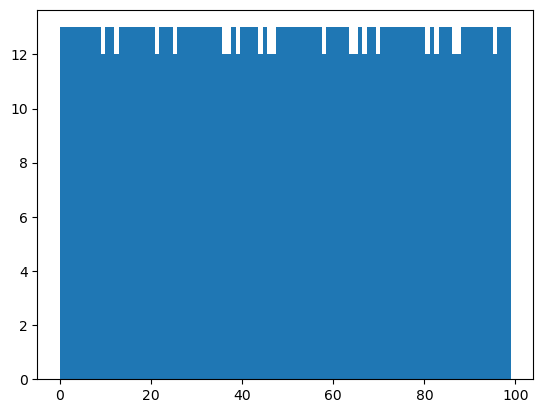

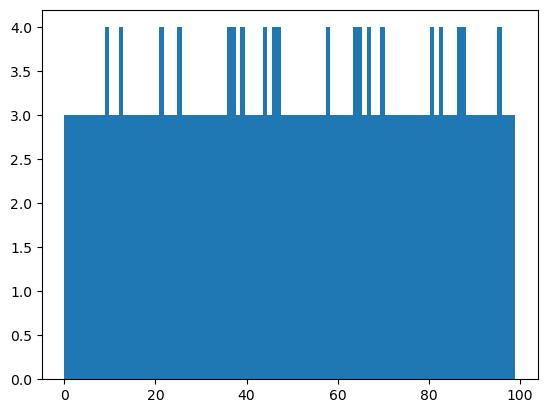

In [14]:

plt.hist(y_train,bins=100)
plt.show()
plt.hist(y_test, bins=100)
plt.show()

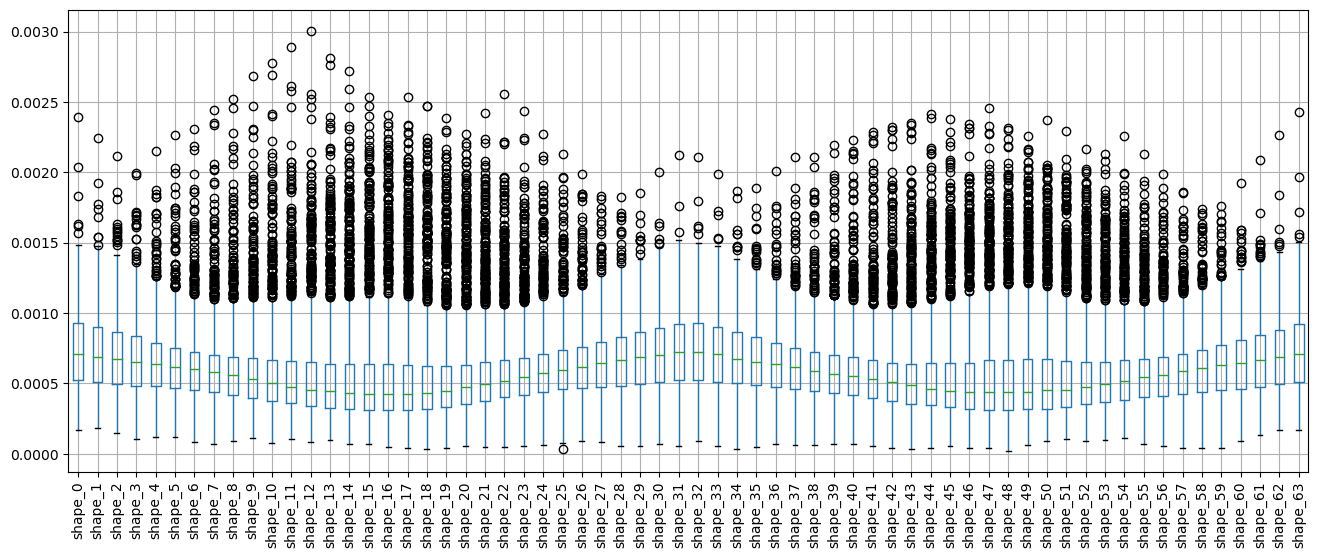

In [15]:

boxplot = dataset.drop(["species"], axis=1).boxplot(figsize=(16,6), rot=90)
plt.show()

#### PCA


In [16]:
ss= StandardScaler(with_mean=True,with_std=False)
train_data= ss.fit_transform(X_train)

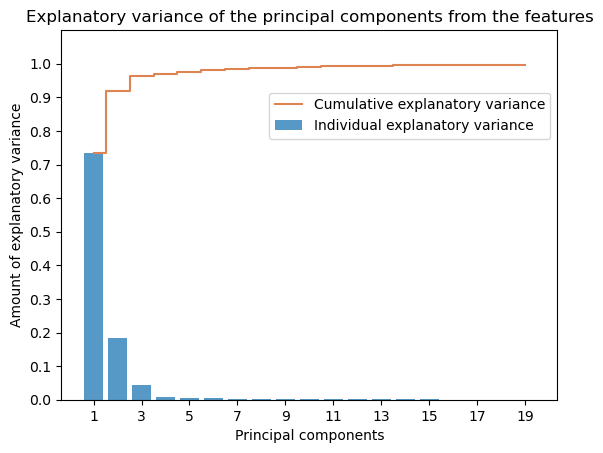

In [17]:
#Anz. Komponenten festlegen
pca = decomposition.PCA(n_components=19)
pc = pca.fit_transform(train_data)
pca3 = decomposition.PCA(n_components=3)
pc3 = pca3.fit_transform(train_data)
var_exp= pca.explained_variance_ratio_
cum_var_exp= np.cumsum(var_exp)
plt.bar(range(1, 20), var_exp, alpha=0.75, align='center',
        label='Individual explanatory variance')
plt.step(range(1, 20), cum_var_exp, where='mid',
         label='Cumulative explanatory variance',color=(0.8666666666666667, 0.5176470588235295, 0.3215686274509804))
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('Amount of explanatory variance')
plt.title("Explanatory variance of the principal components from the features")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.85))
plt.xticks(list(range(1,20,2)))
plt.yticks([i*0.1for i in range(0,11)])
plt.show()



In [123]:
def run_pca(X_train, y_train,  mean_widget, std_widget, x_widget, labels_map= labels_map, labels_inv_map= labels_inv_map):
    
    
    
    ss= StandardScaler(with_mean=mean_widget,with_std=std_widget)
    train_data= ss.fit_transform(X_train)
    
    pca = decomposition.PCA(n_components=4)
    pc = pca.fit_transform(train_data)
    chosen_labels =np.array([labels_map.get(name) for name in x_widget.value])
    ix_true = np.argwhere(np.in1d(y_train, chosen_labels)).flatten()
    
    pc = pca.transform(X_train[ix_true, ...])
    
    pc_df = pd.DataFrame(data = pc ,
        columns = ['PC1', 'PC2','PC3','PC4'])
    pc_df['Species'] = np.array([labels_inv_map.get(label_nr) for label_nr in y_train[ix_true]])
    
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
    #plt.figure(figsize=(15,8))
    sns.lmplot( x="PC1", y="PC2",
               data=pc_df,
               fit_reg=False,
               hue='Species', # color by cluster
               legend=True,
               scatter_kws={"s": 32},
              height=8.27, aspect=11.2/8.27)
    plt.ticklabel_format(style='sci', axis='y')
    
    plt.xlabel("PC1",size=14)
    plt.ylabel("PC2",size=14)
    plt.title("\nPCA Plant Species\n", size=20)


    
    
    plt.show()
    

In [124]:
def load_widgets():
    """
    Load and display the Jupyter widgets    
    """

    species = list(sorted(set(dataset.species)))


    # Setting options
    x_widget = widgets.SelectMultiple(options = species, value=["Magnolia Heptapeta"], 
                                      description="Species:", disabled=False,
                                      layout=Layout(display="flex", flex_flow='column'))

    mean_widget = widgets.Checkbox(value=True, description='Scale by Mean:')
    std_widget = widgets.Checkbox(value=True, description='Scale by Std:')

    button_widget = widgets.Button(description='Run simulation',
                                   disabled=False,
                                   button_style='', tooltip='Run simulation')
    
    def run_all(ev):
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

    button_widget.on_click(run_all)


    # Display
    display(x_widget)
    display(mean_widget)
    display(std_widget)
    #display(button_widget)

    return x_widget, mean_widget, std_widget, button_widget 

In [125]:
x_widget, mean_widget, std_widget, button_widget= load_widgets()


# Include Feature Imporance, so I could your RF Model 
#

SelectMultiple(description='Species:', index=(40,), layout=Layout(display='flex', flex_flow='column'), options…

Checkbox(value=True, description='Scale by Mean:')

Checkbox(value=True, description='Scale by Std:')

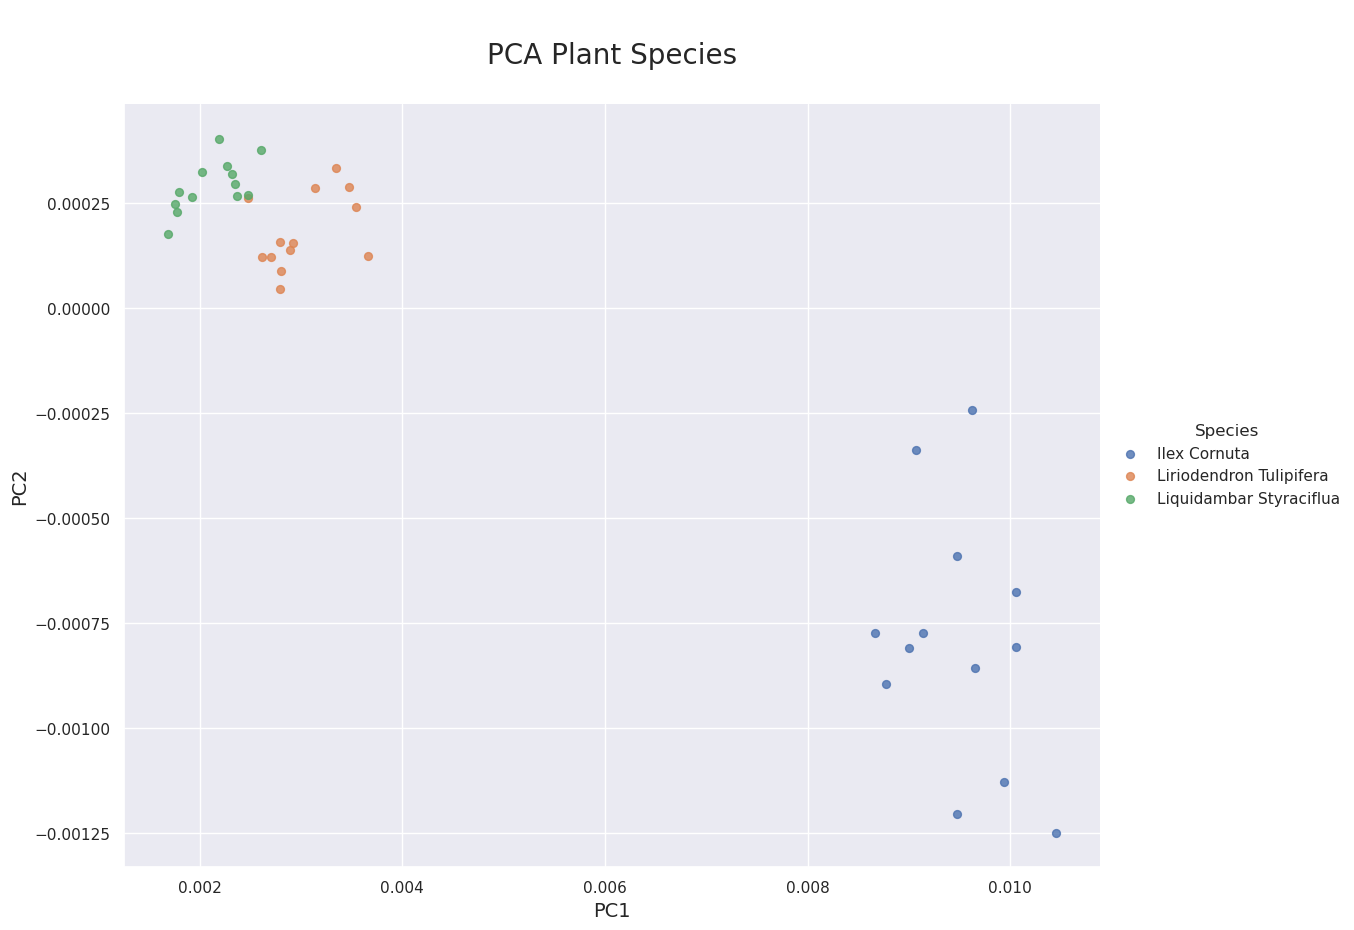

In [127]:
run_pca(X_train, y_train,  mean_widget, std_widget, x_widget)

In [105]:
a = np.array([2,3,6,4])

b = np.array([3,5])

np.in1d(a, b)

array([False,  True, False, False])

In [106]:
print(x_widget.value)


('Magnolia Heptapeta',)


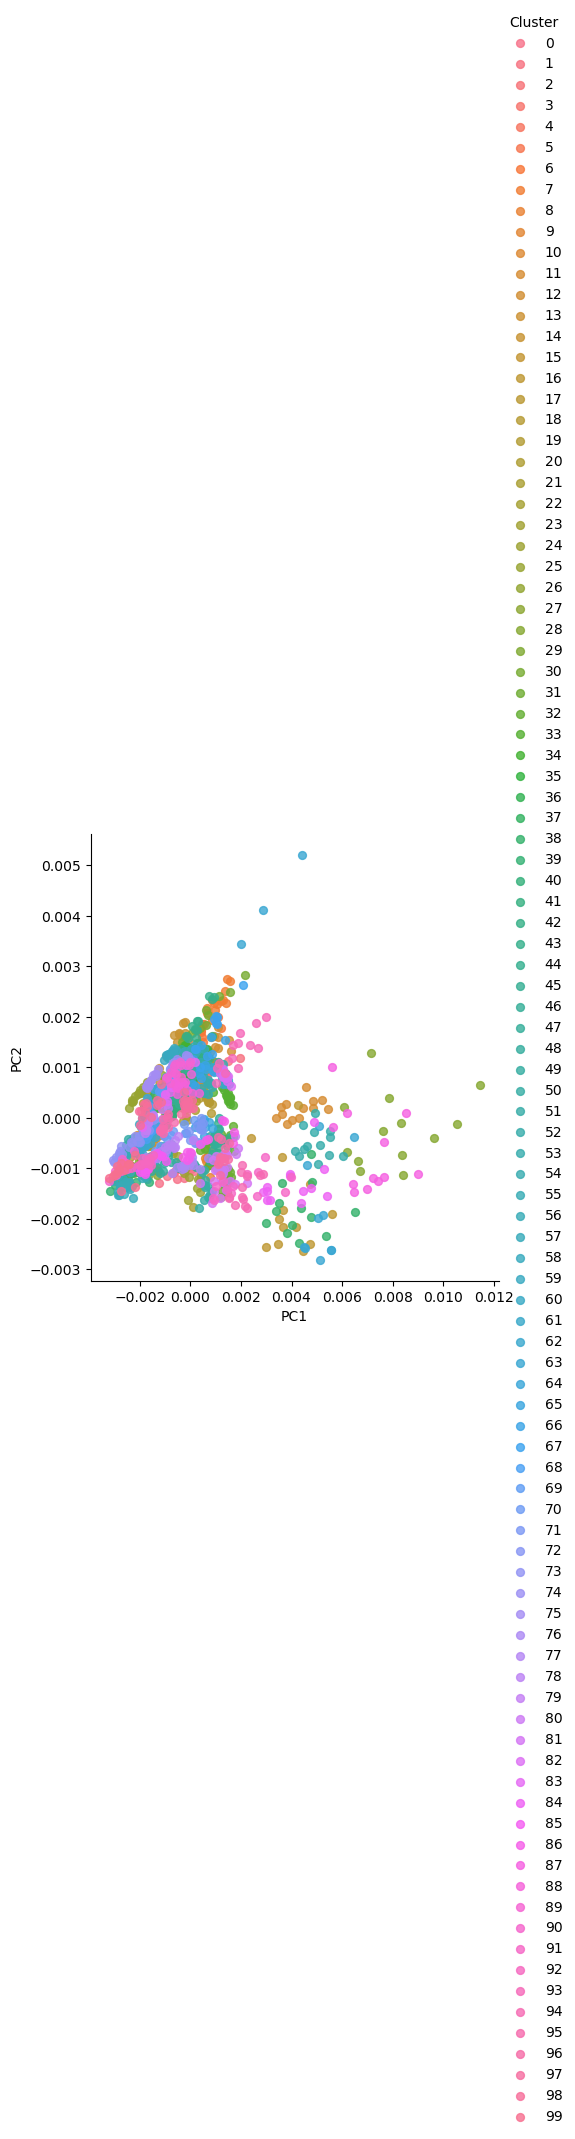

In [45]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(train_data)
pca.explained_variance_ratio_

pc_df = pd.DataFrame(data = pc ,
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = y_train

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})


sns.lmplot( x="PC1", y="PC2",
  data=pc_df,
  fit_reg=False,
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 32})
plt.show()